In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Customer_data1.csv', encoding='cp949')
df

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...
134131,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,2,75000.0,0.0,20000
134132,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,1,310000.0,0.0,10000
134133,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,1,89000.0,0.0,10000
134134,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,1,9000.0,1.0,4000


In [8]:
df.columns

Index(['고객ID', '사용기기', '사용OS', '유입경로', '회원상태', '거주지', '연령', '서비스총구매수', '총구매금액',
       '총수정요청수', '총추가결제금액'],
      dtype='object')

In [9]:
df1=df[['연령', '서비스총구매수', '총구매금액','총수정요청수', '총추가결제금액']]
df1

,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,25.0,1,44500.0,0.0,14500
1,26.0,1,44500.0,0.0,14500
2,23.0,1,34500.0,0.0,14500
3,20.0,1,364500.0,0.0,14500
4,28.0,1,34500.0,0.0,14500
...,...,...,...,...,...
134131,21.0,2,75000.0,0.0,20000
134132,26.0,1,310000.0,0.0,10000
134133,28.0,1,89000.0,0.0,10000
134134,43.0,1,9000.0,1.0,4000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134136 entries, 0 to 134135
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연령       134136 non-null  float64
 1   서비스총구매수  134136 non-null  int64  
 2   총구매금액    134136 non-null  float64
 3   총수정요청수   134136 non-null  float64
 4   총추가결제금액  134136 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 5.1 MB


In [14]:
df1[['총구매금액','연령','총추가결제금액']] = df1[['총구매금액','연령','총추가결제금액']].astype(int)

C:\Users\hdemn\AppData\Local\Temp\ipykernel_248416\2574755261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['총구매금액','연령','총추가결제금액']] = df1[['총구매금액','연령','총추가결제금액']].astype(int)


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134136 entries, 0 to 134135
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연령       134136 non-null  int32  
 1   서비스총구매수  134136 non-null  int64  
 2   총구매금액    134136 non-null  int32  
 3   총수정요청수   134136 non-null  float64
 4   총추가결제금액  134136 non-null  int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 3.6 MB


In [16]:
Q1 = df1.quantile(0.25)  # 1사분위 (25%)
Q3 = df1.quantile(0.75)  # 3사분위 (75%)
IQR = Q3 - Q1  # IQR (사분위 범위)

# 이상치 기준: Q1 - 1.5*IQR 보다 작거나, Q3 + 1.5*IQR 보다 큰 값
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # 컬럼별 이상치 개수 확인

연령          4869
서비스총구매수     7055
총구매금액      16477
총수정요청수     35450
총추가결제금액    11684
dtype: int64


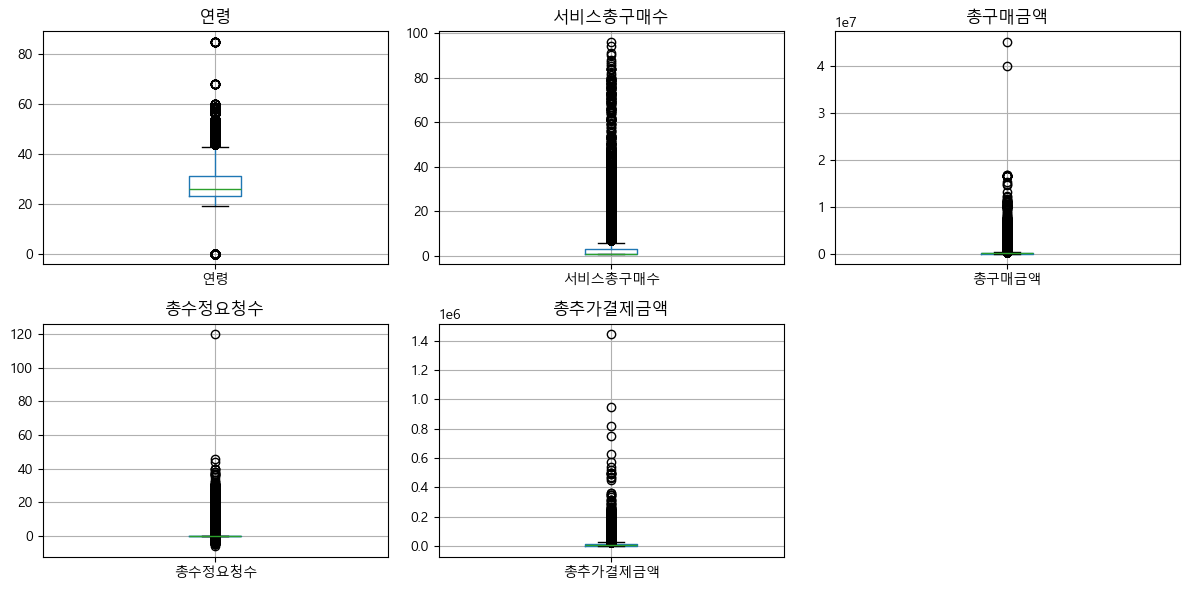

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(df1.columns, 1):
    plt.subplot(2, 3, i)  # 2행 3열 서브플롯
    df1.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()  # 자동 레이아웃 조정
plt.show()

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows (맑은 고딕)
# plt.rc('font', family='AppleGothic')  # Mac 사용자는 이걸로 변경

# ✅ 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

C:\Users\hdemn\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hdemn\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


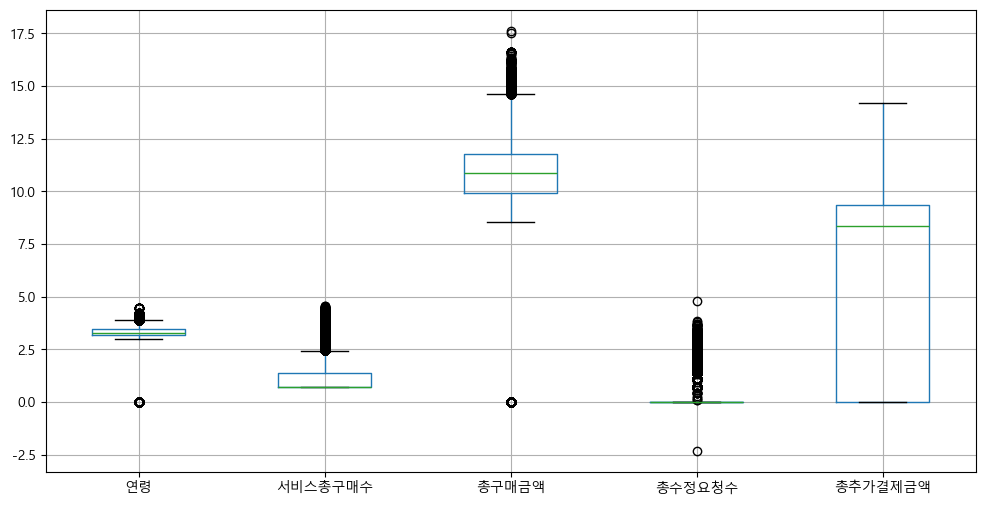

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows (맑은 고딕)
# plt.rc('font', family='AppleGothic')  # Mac 사용자는 이걸로 변경

# ✅ 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import numpy as np

df_log = df1.apply(lambda x: np.log1p(x))  # log(1 + x) 변환
df_log.boxplot(figsize=(12, 6))
plt.show()

In [23]:
df2=df1[['연령']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134136 entries, 0 to 134135
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   연령      134136 non-null  int32
dtypes: int32(1)
memory usage: 524.1 KB


In [25]:
Q1 = df2.quantile(0.25)  # 1사분위 (25%)
Q3 = df2.quantile(0.75)  # 3사분위 (75%)
IQR = Q3 - Q1  # IQR (사분위 범위)

# 이상치 기준: Q1 - 1.5*IQR 보다 작거나, Q3 + 1.5*IQR 보다 큰 값
outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # 컬럼별 이상치 개수 확인

연령    4869
dtype: int64


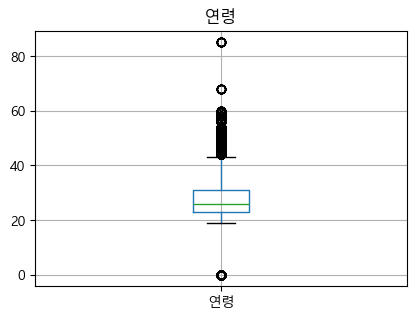

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(df2.columns, 1):
    plt.subplot(2, 3, i)  # 2행 3열 서브플롯
    df2.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()  # 자동 레이아웃 조정
plt.show()

In [27]:
df2.describe()

,연령
count,134136.000000
mean,27.687273
std,6.633998
min,0.000000
25%,23.000000
50%,26.000000
75%,31.000000
max,85.000000


In [28]:
Q3

연령    31.0
Name: 0.75, dtype: float64

In [29]:
df3=df1
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134136 entries, 0 to 134135
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연령       134136 non-null  int32  
 1   서비스총구매수  134136 non-null  int64  
 2   총구매금액    134136 non-null  int32  
 3   총수정요청수   134136 non-null  float64
 4   총추가결제금액  134136 non-null  int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 3.6 MB


In [35]:
df3=df3[(df3['연령'] != 0) & (df3['연령'] != 85)]

In [36]:
Q1 = df3.quantile(0.25)  # 1사분위 (25%)
Q3 = df3.quantile(0.75)  # 3사분위 (75%)
IQR = Q3 - Q1  # IQR (사분위 범위)

# 이상치 기준: Q1 - 1.5*IQR 보다 작거나, Q3 + 1.5*IQR 보다 큰 값
outliers = ((df3 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # 컬럼별 이상치 개수 확인

연령          4719
서비스총구매수     7049
총구매금액      16455
총수정요청수     35412
총추가결제금액    11675
dtype: int64


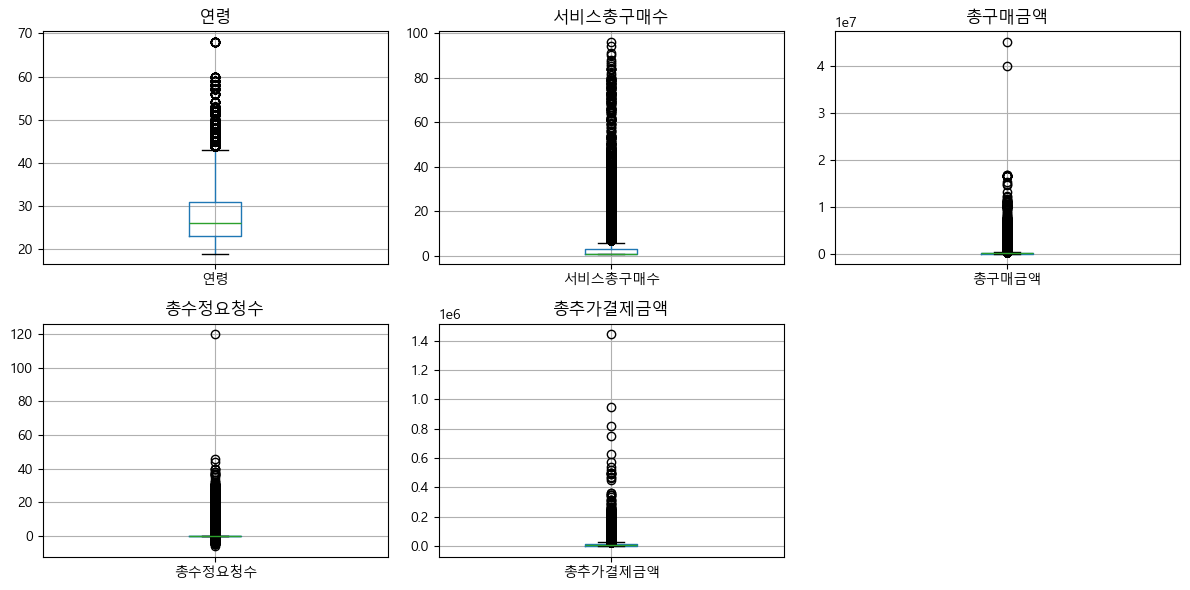

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(df3.columns, 1):
    plt.subplot(2, 3, i)  # 2행 3열 서브플롯
    df3.boxplot(column=[col])
    plt.title(col)

plt.tight_layout()  # 자동 레이아웃 조정
plt.show()

In [38]:
df3.describe()

,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
count,133986.000000,133986.000000,1.339860e+05,133986.000000,1.339860e+05
mean,27.709388,2.503829,1.575837e+05,0.434060,9.889593e+03
std,6.552662,3.985611,4.752366e+05,1.573078,1.845588e+04
min,19.000000,1.000000,0.000000e+00,-6.000000,0.000000e+00
25%,23.000000,1.000000,2.020000e+04,0.000000,0.000000e+00
50%,26.000000,1.000000,5.340000e+04,0.000000,4.200000e+03
75%,31.000000,3.000000,1.315000e+05,0.000000,1.140000e+04
max,68.000000,96.000000,4.505250e+07,120.000000,1.445200e+06
